In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import norm, skew, boxcox
from sklearn.preprocessing import RobustScaler, StandardScaler
from catboost import CatBoostClassifier, Pool
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, plot_confusion_matrix, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler


# Importing Dataset

In [2]:

train_data = pd.read_csv("C:/Users/Pavithra/Documents/DATASETS/Job Change/aug_train.csv")
test_data = pd.read_csv("C:/Users/Pavithra/Documents/DATASETS/Job Change/aug_test.csv")
enrollee_id = test_data["enrollee_id"]


In [3]:
print(" \t Data Columns : \n \n ",train_data.columns)

 	 Data Columns : 
 
  Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [4]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
# ABOUT THE FEATURES

<ol>    
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> enrollee_id : </strong> Unique ID for enrollee </p> </li>  
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> city : </strong> City code </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> city_development_index : </strong> Developement index of the city (scaled) </p> </li>  
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> gender : </strong> Registered person gender (M/F) </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> relevent_experience : </strong> Relevent experience </p> </li>  
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> enrolled_university  : </strong> Type of university of the enrolee </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> education_level : </strong> edu level </p> </li>  
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> major_discipline : </strong> edu discipline of enrollee </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> experience : </strong>Total experience in years </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> company_size : </strong> No of employees in current employer's company </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> company_type : </strong> Type of current employer </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> last_new_job : </strong> Difference in years between previous job and current job </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> training_hours : </strong> training hours completed </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> target : </strong> 0 – Not looking for job change, 1 – Looking for a job change </p> </li>
</ol>

In [7]:
print("Train Data INFO \n")
train_data.info()

Train Data INFO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64

In [8]:
#city
print("{} \n".format(train_data["city"].value_counts()))
print("No of null values : {} \n".format(train_data["city"].isnull().sum()))

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64 

No of null values : 0 



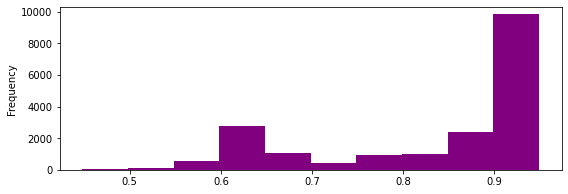

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.824       4
0.807       4
0.625       3
0.781       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64 

null value number :



In [9]:
#city_development_index
plt.figure(figsize=(9,3))
plt.hist(train_data["city_development_index"], color="purple")
plt.ylabel("Frequency")
plt.show()

print("{} \n".format(train_data["city_development_index"].value_counts()))
print("null value number :\n".format(train_data["city_development_index"].isnull().sum()))

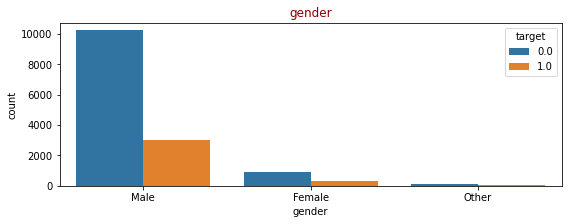

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
null values are: 4508 



In [10]:
#gender 
gender = train_data["gender"].value_counts()
plt.figure(figsize=(9,3))
sns.countplot(x=train_data["gender"], hue = "target", data = train_data)
plt.title("gender", color = "darkred")
plt.show()
print(gender)
print("null values are: {} \n".format(train_data["gender"].isnull().sum()))

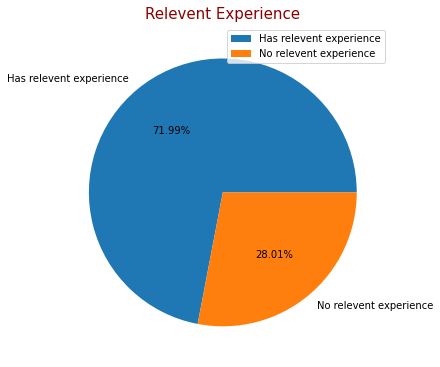

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
null value number -- > 0 



In [11]:
#relevent_experience
experience = train_data["relevent_experience"].value_counts()
data_index = experience.index
data_values = experience.values

plt.figure(figsize = (6,8))
plt.pie(data_values, labels=data_index, autopct='%1.2f%%')
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

print(experience)
print("null value number -- > {} \n".format(train_data["relevent_experience"].isnull().sum()))

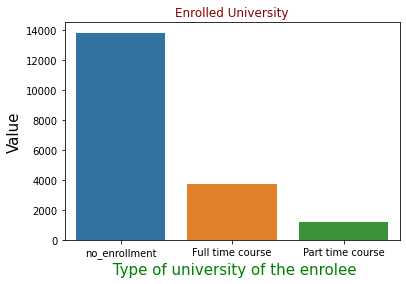

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
null value number -- > 386 



In [12]:
#enrolled_university 
university = train_data["enrolled_university"].value_counts()

ax= sns.barplot(x=university.index, y=university.values)
plt.xlabel(' Type of university of the enrolee', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('Enrolled University', color = "darkred")
plt.show()

print(university)
print("null value number -- > {} \n".format(train_data["enrolled_university"].isnull().sum()))

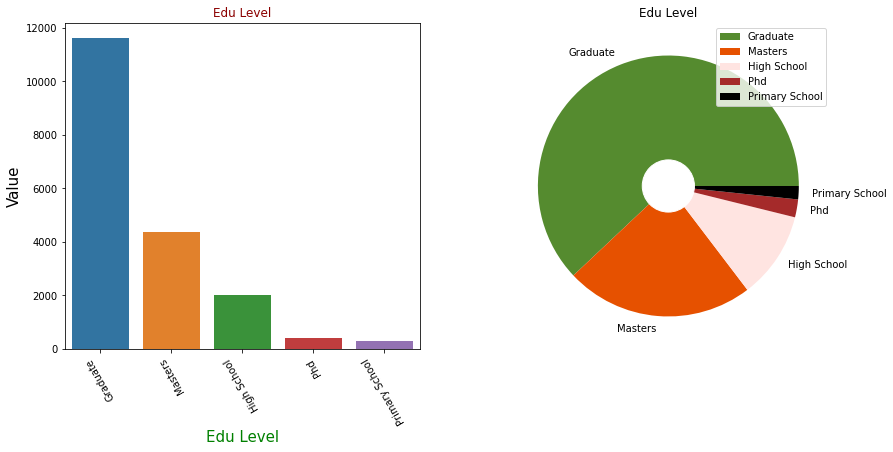

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
null value number -- > 460 



In [13]:
#education_level
colors = ['#558B2F','#E65100','#FFE4E1','#A52A2A','black']
edu_level = train_data["education_level"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax= sns.barplot(x=edu_level.index, y=edu_level.values)
plt.xlabel('Edu Level', size = 15, color = "green") 
plt.xticks(rotation = 120)
plt.ylabel('Value', size = 15) 
plt.title('Edu Level', color = "darkred")

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(edu_level.values, labels = edu_level.index, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Edu Level")
plt.legend()
plt.show()


print(edu_level)
print("null value number -- > {} \n".format(train_data["education_level"].isnull().sum()))

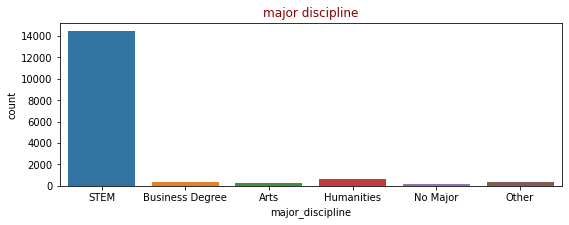

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
null value number :2813 



In [14]:
# major_discipline
mj_discipline = train_data["major_discipline"].value_counts()

plt.figure(figsize=(9,3))
sns.countplot(x=train_data["major_discipline"])
plt.title("major discipline", color = "darkred")
plt.show()

print(mj_discipline)
print("null value number :{} \n".format(train_data["major_discipline"].isnull().sum()))

In [15]:
#experience 
print("{} \n".format(train_data["experience"].value_counts()))
print("null value number -- > {} \n".format(train_data["experience"].isnull().sum()))

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64 

null value number -- > 65 



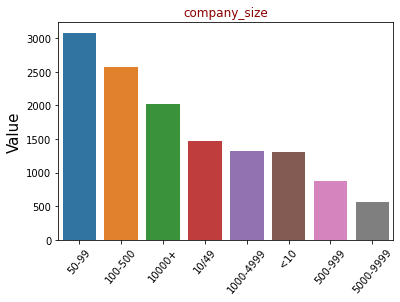

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64
null value number -- > 5938 



In [16]:
#company_size
company_size = train_data["company_size"].value_counts()

ax= sns.barplot(x=company_size.index, y=company_size.values)
plt.ylabel('Value', size = 15) 
plt.xticks(rotation = 50)
plt.title('company_size', color = "darkred")
plt.show()

print(company_size)
print("null value number -- > {} \n".format(train_data["company_size"].isnull().sum()))

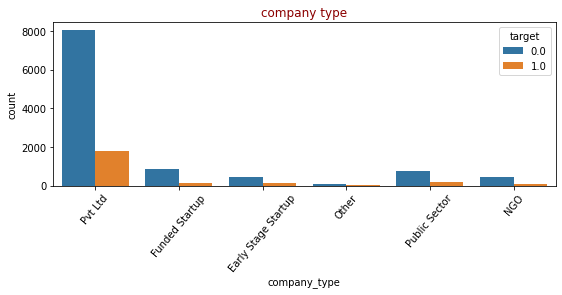

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
null value number -- > 6140 



In [17]:
#company_type
company_type = train_data["company_type"].value_counts()

plt.figure(figsize=(9,3))
sns.countplot(x=train_data["company_type"], hue = "target", data = train_data)

plt.xticks(rotation = 50)
plt.title("company type", color = "darkred")
plt.show()

print(company_type)
print("null value number -- > {} \n".format(train_data["company_type"].isnull().sum()))


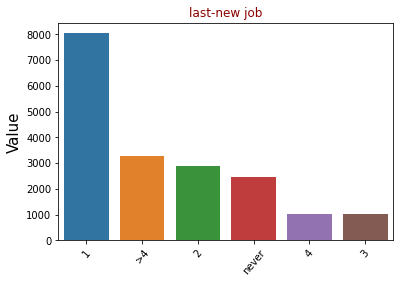

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64
null value number -- > 423 



In [18]:
# last_new_job 
last_new = train_data["last_new_job"].value_counts()

ax= sns.barplot(x=last_new.index, y=last_new.values)
plt.ylabel('Value', size = 15) 
plt.xticks(rotation = 50)
plt.title('last-new job', color = "darkred")
plt.show()

print(last_new)
print("null value number -- > {} \n".format(train_data["last_new_job"].isnull().sum()))

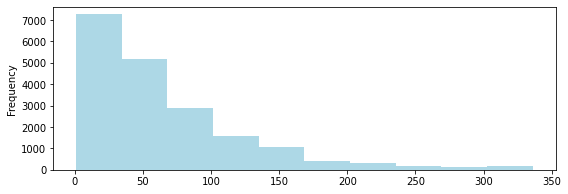

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
286      5
272      5
234      5
238      4
Name: training_hours, Length: 241, dtype: int64 

null value number -- > 0 



In [19]:
#training_hours 
plt.figure(figsize=(9,3))
plt.hist(train_data["training_hours"], color="lightblue")
plt.ylabel("Frequency")
plt.show()

print("{} \n".format(train_data["training_hours"].value_counts()))
print("null value number -- > {} \n".format(train_data["training_hours"].isnull().sum()))

In [20]:
#Data Analysis

In [21]:
# last_new_job - target
train_data[["last_new_job","target"]].groupby(["last_new_job"], as_index = False).mean().sort_values(by = "target",ascending = False)

,last_new_job,target
5,never,0.301387
0,1,0.264303
1,2,0.241379
2,3,0.225586
3,4,0.221574
4,>4,0.182371


In [22]:
# company_type -target
train_data[["company_type","target"]].groupby(
    ["company_type"], as_index = False).mean().sort_values(by = "target",ascending = False)

,company_type,target
3,Other,0.239669
0,Early Stage Startup,0.235489
4,Public Sector,0.219895
2,NGO,0.186180
5,Pvt Ltd,0.180809
1,Funded Startup,0.139860


In [23]:
# gender -target
train_data[["gender","target"]].groupby(
    ["gender"], as_index = False).mean().sort_values(by = "target",ascending = False)

,gender,target
0,Female,0.263328
2,Other,0.261780
1,Male,0.227819


In [24]:
#relevent_experience -target
train_data[["relevent_experience","target"]].groupby(
    ["relevent_experience"], as_index = False).mean().sort_values(by = "target",ascending = False)

,relevent_experience,target
1,No relevent experience,0.338427
0,Has relevent experience,0.214690


In [25]:
#enrolled_university -target
train_data[["enrolled_university","target"]].groupby(
    ["enrolled_university"], as_index = False).mean().sort_values(by = "target",ascending = False)

,enrolled_university,target
0,Full time course,0.380889
1,Part time course,0.252087
2,no_enrollment,0.211406


In [26]:
#education_level -target
train_data[["education_level","target"]].groupby(
    ["education_level"], as_index = False).mean().sort_values(by = "target",ascending = False)

,education_level,target
0,Graduate,0.279790
2,Masters,0.214400
1,High School,0.195340
3,Phd,0.140097
4,Primary School,0.133117


In [27]:
#major_discipline
train_data[["major_discipline","target"]].groupby(
    ["major_discipline"], as_index = False).mean().sort_values(by = "target",ascending = False)


,major_discipline,target
4,Other,0.267717
1,Business Degree,0.262997
5,STEM,0.261593
3,No Major,0.246637
2,Humanities,0.210762
0,Arts,0.209486


In [28]:
# Finding the Missing Values 

In [29]:
train_data_len = len(train_data)
train_data = pd.concat([train_data,test_data],axis = 0).reset_index(drop = True)

In [30]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [31]:
print(" \t Columns with null : ",train_data.columns[train_data.isnull().any()])

 	 Columns with null :  Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job', 'target'],
      dtype='object')


In [32]:
print("how many nulls are there ?\n \n ",train_data.isnull().sum())

how many nulls are there ?
 
  enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64


In [33]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [34]:
train_missing= missing_values_table(train_data)
train_missing

Your selected dataframe has 14 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
company_type,6774,31.8
company_size,6560,30.8
gender,5016,23.6
major_discipline,3125,14.7
target,2129,10.0
education_level,512,2.4
last_new_job,463,2.2
enrolled_university,417,2.0
experience,70,0.3


<AxesSubplot:>

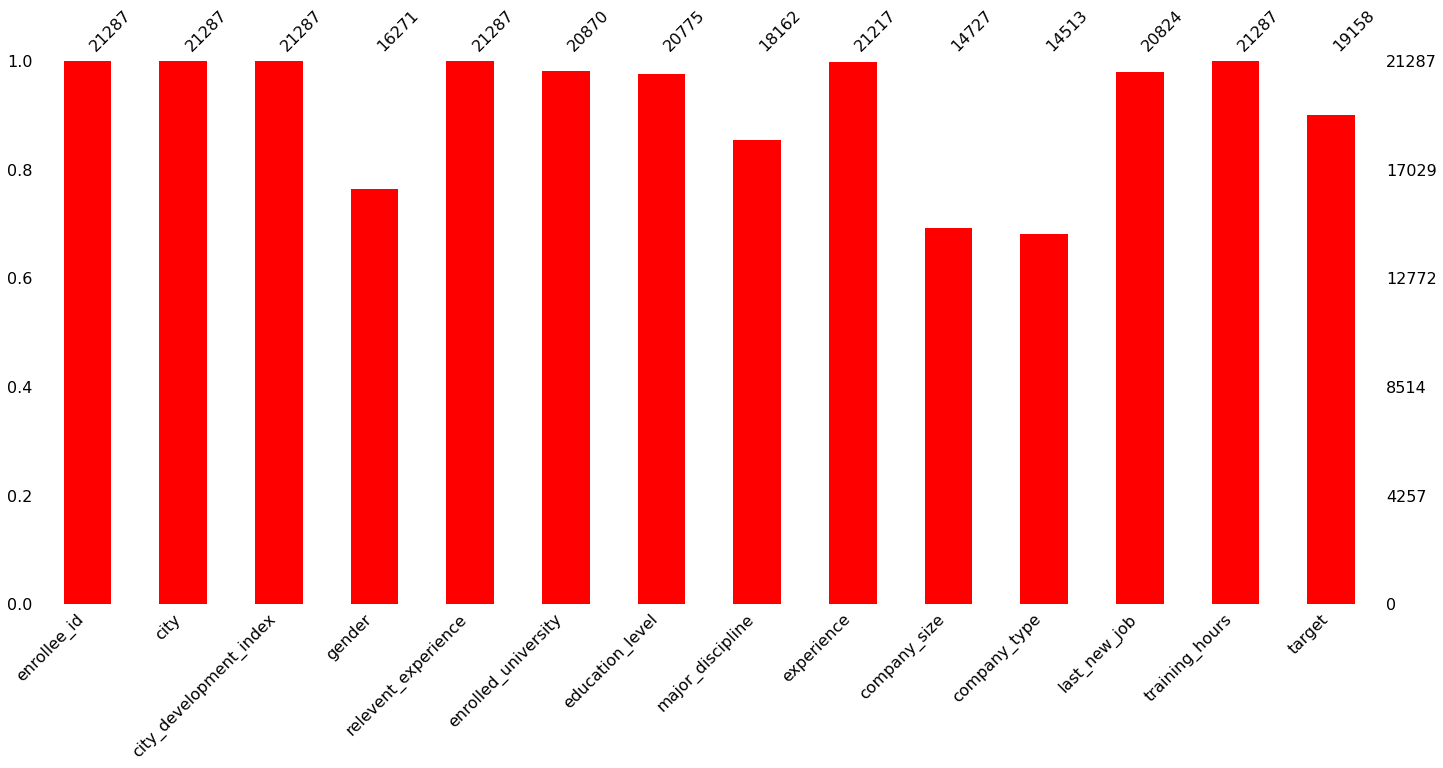

In [35]:
msno.bar(train_data, color = "red")

<AxesSubplot:>

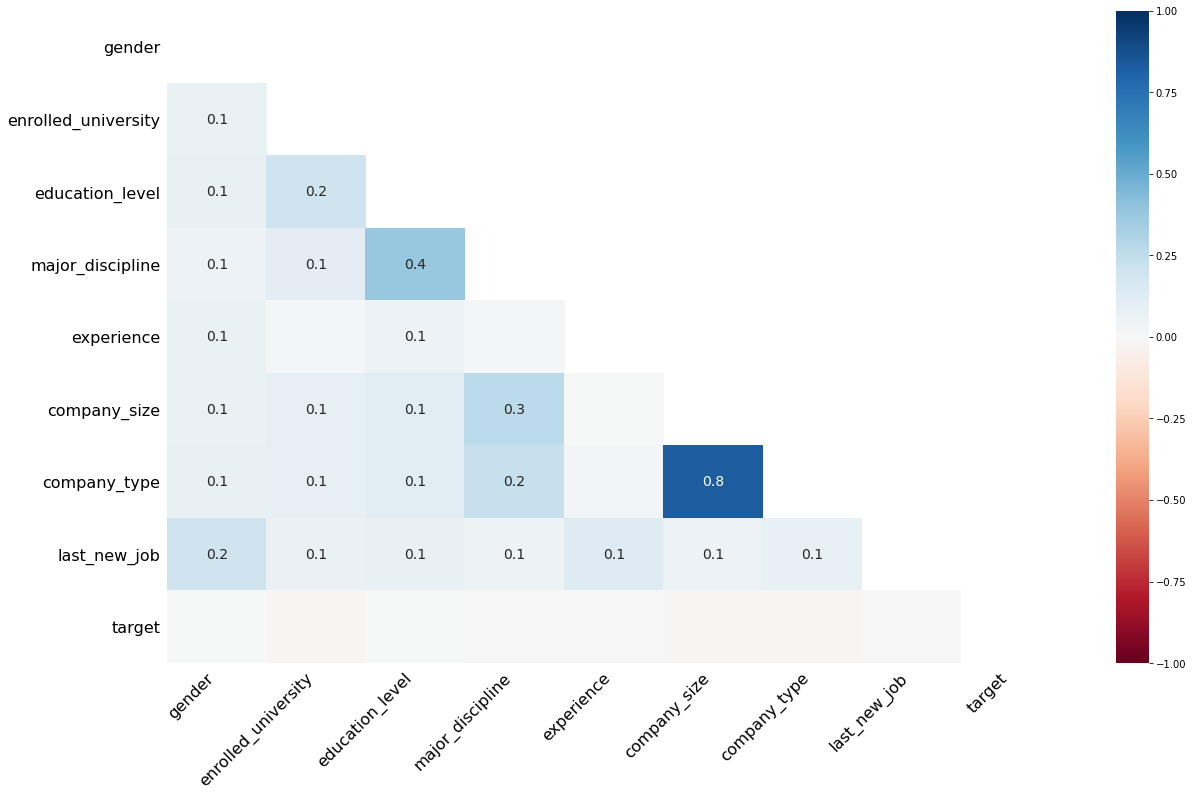

In [36]:
msno.heatmap(train_data)

In [37]:
#Filling out the missing values

In [38]:
train_data.dropna(subset=["experience"], inplace=True)
train_data.dropna(subset=["enrolled_university"], inplace=True)
train_data.dropna(subset=["last_new_job"], inplace=True)
train_data.dropna(subset=["education_level"], inplace=True)

In [39]:
train_missing1= missing_values_table(train_data)
train_missing1

Your selected dataframe has 14 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
company_type,6055,30.2
company_size,5887,29.4
gender,4306,21.5
major_discipline,2471,12.3
target,2018,10.1


In [40]:
print("NULL experience --> ",train_data["experience"].isnull().sum())
print("NULL enrolled_university --> ",train_data["enrolled_university"].isnull().sum())
print("NULL last_new_job --> ",train_data["last_new_job"].isnull().sum())
print("NULL education_level --> ",train_data["education_level"].isnull().sum())
                        

NULL experience -->  0
NULL enrolled_university -->  0
NULL last_new_job -->  0
NULL education_level -->  0


In [41]:
#major_discipline
print("most repetitive --> ",train_data["major_discipline"].value_counts().index[0])
train_data["major_discipline"].fillna( method ='ffill', limit = 3, inplace = True)

most repetitive -->  STEM


In [42]:
train_data.dropna(subset=["major_discipline"], inplace=True)
print("NULL major_discipline --> ",train_data["major_discipline"].isnull().sum())

NULL major_discipline -->  0


In [43]:
#company_size
train_data["company_size"].fillna( method ='ffill', limit = 2, inplace = True)

In [44]:
train_data.dropna(subset=["company_size"], inplace=True)
print("NULL company_size --> ",train_data["company_size"].isnull().sum())

NULL company_size -->  0


In [45]:
#company_type
train_data["company_type"].fillna( method ='ffill', limit = 2, inplace = True)

In [46]:
train_data.dropna(subset=["company_type"], inplace=True)
print("NULL company_type --> ",train_data["company_type"].isnull().sum())

NULL company_type -->  0


In [47]:
#gender
train_data["gender"].fillna( method ='ffill', limit = 2, inplace = True)

In [48]:
train_data.dropna(subset=["gender"], inplace=True)
print("NULL gender --> ",train_data["gender"].isnull().sum())

NULL gender -->  0


In [49]:
#gender
# male = 0 , female = 1, other = 2
train_data["gender"] = [ 0 if gender == "Male"
                        else 1 if gender == "Female"
                        else 2 for gender in train_data["gender"]]

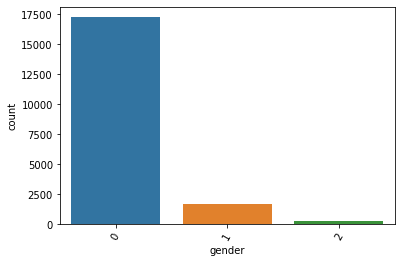

In [50]:
sns.countplot(x="gender", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [51]:
#relevent_experience
# Has relevent experience = 0 , No relevent experience = 1
train_data["relevent_experience"] = [ 0 if i == "Has relevent experience"
                                    else 1 for i in train_data["relevent_experience"]]


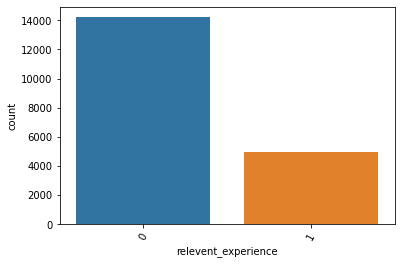

In [52]:
sns.countplot(x="relevent_experience", data = train_data)
plt.xticks(rotation = 60)
plt.show()

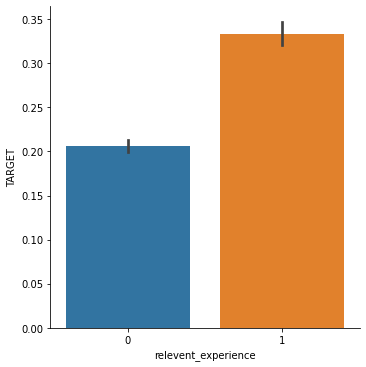

In [53]:
g = sns.catplot(x = "relevent_experience", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [54]:
#enrolled_university 
# no_enrollment = 0 , Full time course = 1, Part time course = 2

train_data["enrolled_university"] = [ 0 if i == "no_enrollment"
                                    else 1 if i == "Full time course"
                                    else 2 for i in train_data["enrolled_university"]]

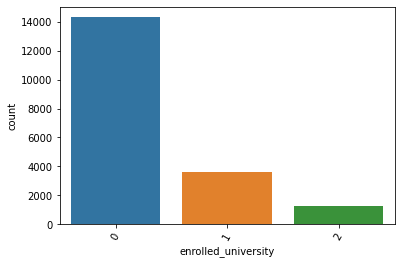

In [55]:
sns.countplot(x="enrolled_university", data = train_data)
plt.xticks(rotation = 60)
plt.show()

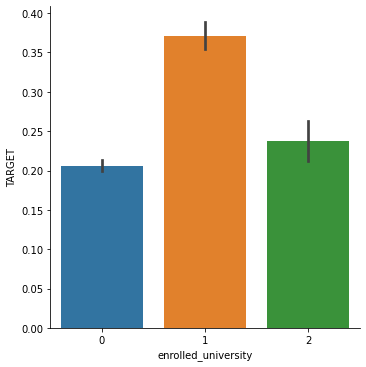

In [56]:
g = sns.catplot(x = "enrolled_university", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [57]:
#education_level
# Graduate = 0 , Masters = 1, High School = 2, Phd = 3, Primary School = 4 

train_data["education_level"] = [ 0 if i == "Graduate"
                                    else 1 if i == "Masters"
                                    else 2 if i == "High School"
                                    else 3 if i == "Phd" 
                                    else 4 for i in train_data["education_level"]]

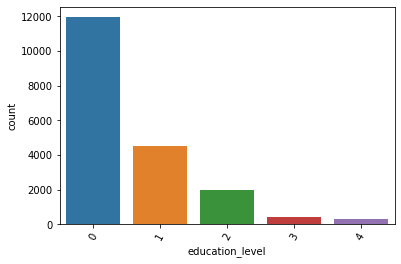

In [58]:
sns.countplot(x="education_level", data = train_data)
plt.xticks(rotation = 60)
plt.show()

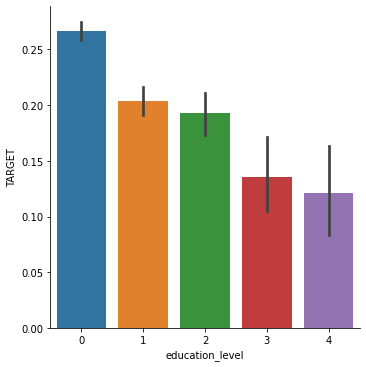

In [59]:
g = sns.catplot(x = "education_level", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [60]:
#major_discipline 
# STEM  = 0 , Humanities = 1, Business Degree = 2, Arts = 3, No Major = 4, Other = 5 

train_data["major_discipline"] = [ 0 if i == "STEM"
                                    else 1 if i == "Humanities"
                                    else 2 if i == "Business Degree"
                                    else 3 if i == "Arts" 
                                    else 4 if i == "No Major" 
                                    else 5 for i in train_data["major_discipline"]]

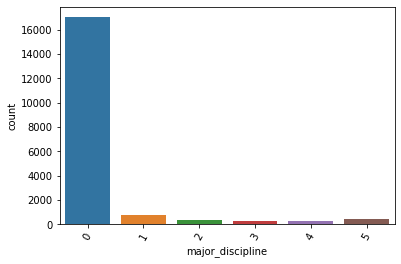

In [61]:
sns.countplot(x="major_discipline", data = train_data)
plt.xticks(rotation = 60)
plt.show()

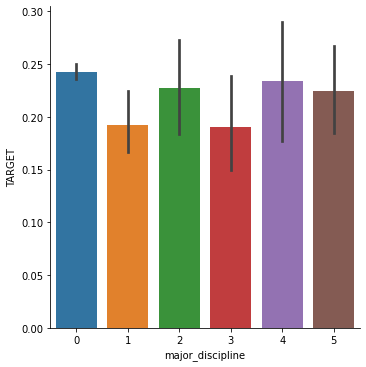

In [62]:
g = sns.catplot(x = "major_discipline", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [63]:
#experience
train_data["experience"] = [ 0 if i == "2" or i == "1" or i == "4" or i == "<1" or i == "3"
                                    else 1 if i == "5>" or i == "11" or i == "7" or i == "10" or i == "6" or i == "9" or i == "8" or i == "20"
                                    else 2 for i in train_data["experience"]]

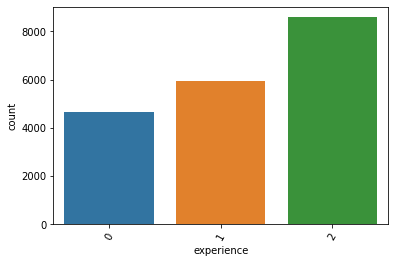

In [64]:
#experience
sns.countplot(x="experience", data = train_data)
plt.xticks(rotation = 60)
plt.show()

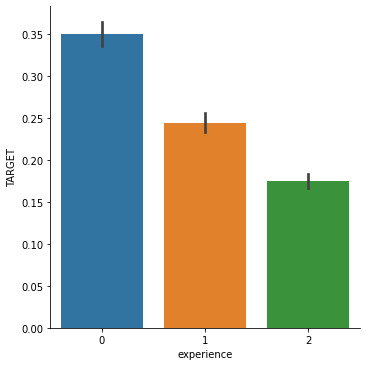

In [65]:
g = sns.catplot(x = "experience", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [66]:
#company_size
train_data["company_size"] = [ 0 if i == "10/49"
                                    else 1 for i in train_data["company_size"]]

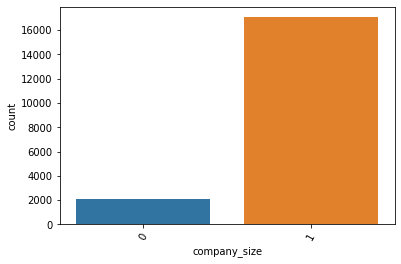

In [67]:
sns.countplot(x="company_size", data = train_data)
plt.xticks(rotation = 60)
plt.show()

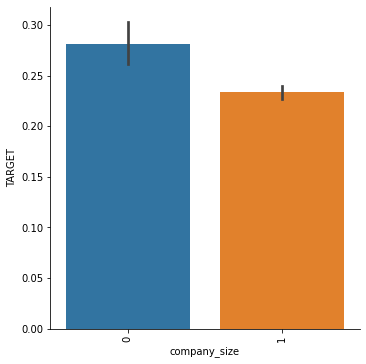

In [68]:
g = sns.catplot(x = "company_size", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()

In [69]:
#company_type
# pvt ltd = 0, Funded Startup  = 1 , Public Sector  = 2, Early Stage Startup = 3, NGO = 4 , else 5 

train_data["company_type"] = [ 0 if i == "Pvt Ltd"
                               else 1 if i == "Funded Startup"
                               else 2 if i == "Public Sector"
                               else 3 if i == "Early Stage Startup"
                               else 4 if i == "NGO" 
                               else 5 for i in train_data["company_type"]]

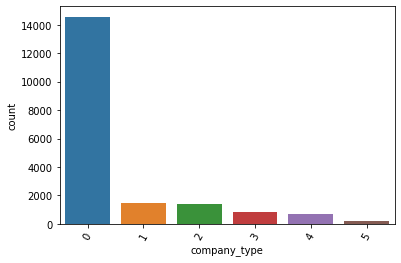

In [70]:
sns.countplot(x="company_type", data = train_data)
plt.xticks(rotation = 60)
plt.show()

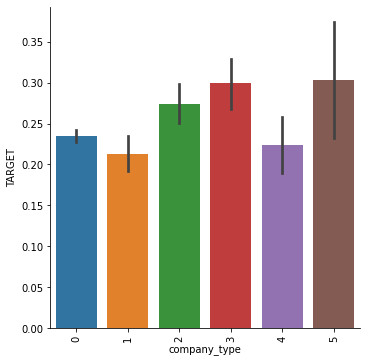

In [71]:
g = sns.catplot(x = "company_type", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()

In [72]:
train_data["company_type"].value_counts()

0    14566
1     1469
2     1390
3      864
4      721
5      168
Name: company_type, dtype: int64

In [73]:
train_data["company_type"] = [ 0 if i == 3 or i == 4
                               else 1 if i == 2
                               else 2 for i in train_data["company_type"]]

In [74]:
train_data["last_new_job"]

1           >4
2        never
4            4
5            1
6            1
         ...  
21279       >4
21280    never
21281    never
21285        1
21286        2
Name: last_new_job, Length: 19178, dtype: object

In [75]:
#last_new_job
train_data["last_new_job"] = [ 0 if i == "1"
                               else 1 if i == "2"
                               else 2 if i == "3"
                               else 3 if i == "4"
                               else 4 if i == "never" 
                               else 5 for i in train_data["last_new_job"]]


train_data["last_new_job"]

1        5
2        4
4        3
5        0
6        0
        ..
21279    5
21280    4
21281    4
21285    0
21286    1
Name: last_new_job, Length: 19178, dtype: int64

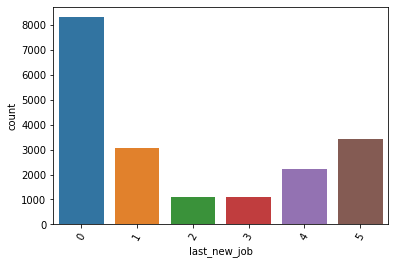

In [76]:
sns.countplot(x="last_new_job", data = train_data)
plt.xticks(rotation = 60)
plt.show()

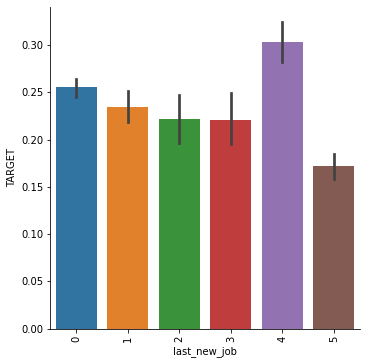

In [77]:
g = sns.catplot(x = "last_new_job", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()

In [78]:
train_data["last_new_job"] = [ 0 if i == 4
                               else 1 if i == 5
                               else 2 for i in train_data["last_new_job"]]

In [79]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,0,1,0,0,0,2,1,2,1,47,0.0
2,11561,city_21,0.624,0,1,1,0,0,2,1,2,0,83,0.0
4,666,city_162,0.767,0,0,0,1,0,2,1,2,2,8,0.0
5,21651,city_176,0.764,0,0,2,0,0,1,1,2,2,24,1.0
6,28806,city_160,0.920,0,0,0,2,0,2,1,2,2,24,0.0


In [80]:
#city
le = LabelEncoder()
train_data["city"] = le.fit_transform(train_data["city"])

C:\Users\Pavithra\anaconda3\envs\myenv1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


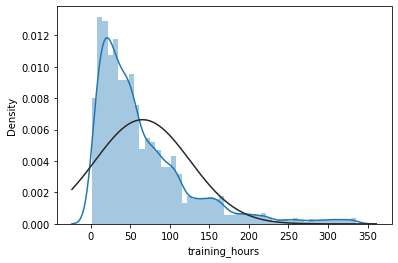

mu training_hours : 65.31629992699969, sigma training_hours : 60.1290749004222



In [81]:
# training_hours
sns.distplot(train_data["training_hours"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(train_data["training_hours"])
print("mu {} : {}, sigma {} : {}".format("training_hours", mu, "training_hours", sigma))
print()

In [82]:
#data is mostly in the right half, or is right skewed. Have to convert to normal form

In [83]:
train_data["training_hours"], lam = boxcox(train_data["training_hours"])

C:\Users\Pavithra\anaconda3\envs\myenv1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


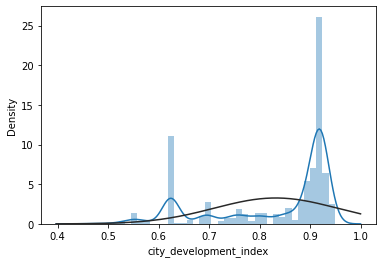

mu city_development_index : 0.8319748670351446, sigma city_development_index : 0.12204336633570376



In [84]:
# city_development_index
sns.distplot(train_data["city_development_index"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(train_data["city_development_index"])
print("mu {} : {}, sigma {} : {}".format("city_development_index", mu, "city_development_index", sigma))
print()

In [85]:
train_data["city_development_index"], lam = boxcox(train_data["city_development_index"])

In [86]:
train_data = train_data.reset_index(drop=True)

In [87]:
test = train_data[17248:]
test.drop(labels = ["target","enrollee_id"],axis = 1, inplace = True)

C:\Users\Pavithra\anaconda3\envs\myenv1\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [88]:
test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
17248,78,-0.111066,0,0,1,0,0,1,1,2,2,3.997935
17249,5,-0.064949,1,0,0,0,0,2,1,2,2,6.970074
17250,64,-0.151316,0,1,0,2,0,0,1,2,0,3.446792
17251,26,-0.111066,0,0,0,1,0,1,0,2,2,5.098878
17252,5,-0.064949,0,0,0,0,0,2,1,2,1,6.310782


In [89]:
train = train_data[:17248]
train.drop(labels = ["enrollee_id"],axis = 1, inplace = True)

C:\Users\Pavithra\anaconda3\envs\myenv1\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [90]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,77,-0.127038,0,1,0,0,0,2,1,2,1,5.454301,0.0
1,64,-0.151316,0,1,1,0,0,2,1,2,0,6.610489,0.0
2,50,-0.129335,0,0,0,1,0,2,1,2,2,2.498590,0.0
3,57,-0.130070,0,0,2,0,0,1,1,2,2,4.225629,1.0
4,49,-0.064949,0,0,0,2,0,2,1,2,2,4.225629,0.0


In [91]:
X = train.drop(labels = "target", axis = 1)
y = train["target"]

In [92]:
# TRAIN TEST SPLIT

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 13798
X_test 3450
y_train 13798
y_test 3450
test 1930


In [94]:
# model accuracy
result = []

# XG Boost 

In [95]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result.append(acc_xgb)
print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)

C:\Users\Pavithra\anaconda3\envs\myenv1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RESULT
XGBoost Model Acc :  0.7965217391304348


C:\Users\Pavithra\anaconda3\envs\myenv1\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


# Random Forest 

In [96]:
random_forest_model = RandomForestClassifier(max_depth=7, random_state= 59)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)


RESULT
Random Forest Model Acc :  0.8049275362318841


# KNN Model

In [97]:
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=knn_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_knn = clf.predict(X_test)
cm_random_knn = confusion_matrix(y_pred_knn, y_test)
acc_random_knn = accuracy_score(y_test, y_pred_knn)
result.append(acc_random_knn)
print("RESULT")
print("KNN Model Acc : ",acc_random_knn)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
RESULT
KNN Model Acc :  0.7878260869565218


# SVM

In [98]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_pred_svm, y_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
result.append(acc_svm)
print("RESULT")
print("SVM Model Acc : ",acc_svm)

RESULT
SVM Model Acc :  0.7634782608695653


# Model Results

In [99]:
results = pd.DataFrame({"Model Result":result, 
                        "Models":["XGBoost",
                                  "RandomForest",
                                  "KNN", 
                                  "SVM"]})

In [100]:
results

,Model Result,Models
0,0.796522,XGBoost
1,0.804928,RandomForest
2,0.787826,KNN
3,0.763478,SVM


C:\Users\Pavithra\anaconda3\envs\myenv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


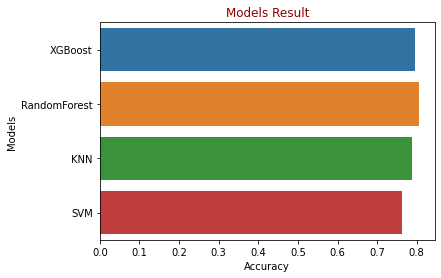

In [101]:
g = sns.barplot("Model Result", "Models", data = results)
g.set_xlabel("Accuracy")
g.set_title("Models Result", color = "darkred")
plt.show()

In [119]:
#PREDICTION USING LOGISTIC REGRESSION

In [120]:
logistic = LogisticRegression(random_state=0)

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())



pipe.fit(X_train, y_train) 


pipe.score(X_test, y_test)

#pipe.predict_proba(X_test)
#y_pred_logistic = logistic.predict(X_test)

0.7782608695652173

In [122]:
prob_arr = pipe.predict_proba(X_test)
probabilities_of_exit = pd.DataFrame(prob_arr)

In [123]:
probabilities_of_exit

,0,1
0,0.921169,0.078831
1,0.862138,0.137862
2,0.911158,0.088842
3,0.483646,0.516354
4,0.509347,0.490653
...,...,...
3445,0.850297,0.149703
3446,0.909675,0.090325
3447,0.610936,0.389064
3448,0.864240,0.135760
